# More Multivariate Normal Things


## What is not Multivariate Regression

--- 

Rather than $\mathbf{y}_{n\times 1} \sim \mathcal{MVN}(\mathbf{X}_{n\times p}\boldsymbol{\beta}_{p\times 1}, \Sigma_{n\times n} = \sigma^2I_{n\times n})$

- where we used a multivariate $\mathcal{MVN}(\underset{p \times 1}{\boldsymbol\beta_0}, \underset{p \times p}{\Sigma_\beta})$ prior fo  $\boldsymbol \beta_{p\times 1}$ 
- and a univariate prior for precision $\phi = \sigma^{-2}$ or variance $\sigma^2$ such as $\text{gamma}(a,b)$ or $\mathcal{IG}(a,b)$

what about $\underset{m\times 1}{\mathbf{y}_i} \overset{iid}{\sim} \mathcal{MVN}(\boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i},  \Sigma_{m\times m} \neq \sigma^2I_{n\times n})$ which models

- $\underset{n\times m}{\mathbf{y}}$ with
    - $E[\underset{n\times p}{\mathbf{y}}| \underset{n\times m}{\mathbf{X}} ] = \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}$
    - $COV[\underset{\text{both } m\times 1}{\mathbf{y}_i, \mathbf{y}_j}] = \Sigma_{m\times m} $


The **likelihood** is
   
$\begin{align*}
f(\underset{n\times m}{\mathbf{y}}|\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}, \Sigma_{m\times m})
& ={} \prod_{i=1}^n (2\pi )^{-m/2}\det(\Sigma_{m\times m})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )^\top \Sigma_{m\times m}^{-1}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )\right)\\ 
& \propto{} \det({ {\Sigma }})^{-n/2}\,\exp \left(\sum_{i=1}^n -{\frac {1}{2}}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )^\top\Sigma_{m\times m}^{-1}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )\right)\\ 
& \quad\; \text{The trace of a square matrix is the sum of its diagonal elements}\\
& = \det({ {\Sigma }})^{-n/2}\,\exp \left(-\frac{1}{2} \text{trace}\big((\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}) \Sigma_{m\times m}^{-1} (\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m})^\top\big)\right)\\ 
& = \det({ {\Sigma }})^{-n/2}\,\exp \overset{\Large \text{trace}(ABC) \; = \;  \text{trace}(CAB)}{\left( -\frac{1}{2} \text{trace}\big((\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m})^\top(\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}) \Sigma_{m\times m}^{-1} \big)\right)}\\ 
& = \det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big(\underset{\text{both } m\times m}{\boldsymbol \epsilon^\top \boldsymbol \epsilon} \underset{m\times m}{\Sigma^{-1}}\big)\right)\\ 
& = \det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\ 
& \propto {}
\mathcal{W}^{-1}\left({\mathbf\Psi} = \tilde{\underset{m\times m}{\boldsymbol \Psi}}, \nu = n-m-1 \right) 
\end{align*}$

an [Inverse-Wishart](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution) distribution when viewed as a function of $\Sigma$.


## Inverse-Wishart Distributions

---

Thus for an **inverse Wishart** $\mathcal{W}^{-1}\left({\mathbf\Psi} = \underset{m\times m}{\boldsymbol \Psi_0}, \nu = n_0 \right)$ 
 prior for covariance $\Sigma_{m\times m}$ the **full conditional**

$\begin{align*}
f(\Sigma_{m\times m} | \underset{n\times m}{\mathbf{y}},\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}) &\propto{}
f(\underset{n\times m}{\mathbf{y}}|\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}, \Sigma_{m\times m}) \times p(\Sigma)\\
&\propto{} 
\det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) \right) \times 
\det({\Sigma})^{-(n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( {\underset{m\times m}{\boldsymbol \Psi_0}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
&\propto{} 
\det({\Sigma})^{-(n+n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) -\frac{1}{2} \text{trace}\big( {\underset{m\times m}{\boldsymbol \Psi_0}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
&\propto{} 
\det({\Sigma})^{-(n+n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\Big( \big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} + {\underset{m\times m}{\boldsymbol \Psi_0}} \big) \underset{m\times m}{\Sigma^{-1}} \Big) \right) 
\end{align*}$

is also seen to be an **inverse Wishart** $\mathcal{W}^{-1}\left({\mathbf\Psi} = \tilde{\underset{m\times m}{\boldsymbol \Psi}} + \underset{m\times m}{\boldsymbol \Psi_0}, \nu = n+n_0 \right)$ 

---

## Conditional MVN distributions (are MVN distributions) 

For **MVN** $f( \mathbf{\tilde x} = (\mathbf x,\mathbf x^*) )$ 

$$p\left(\mathbf{\tilde x}\;\Bigg|\;\boldsymbol \mu = \left[\begin{array}{c} \underset{q\times1}{\boldsymbol \mu_{\mathbf{ x}}}\\ \underset{r\times1}{\boldsymbol \mu_{\mathbf{ x^*}}} \end{array} \right], \boldsymbol \Sigma = \left[\begin{array}{cc}  \underset{q\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x}}} &  \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}}\\  \underset{r \times q}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}} =  {\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}^T} &  \underset{r\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x*}}}\end{array}\right] \right) = {\frac {\exp \left(-{\frac {1}{2}}\left({\mathbf {\tilde x} }-{\boldsymbol {\mu }}\right)^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}\left({\mathbf {\tilde x} }-{\boldsymbol {\mu }}\right)\right)}{\sqrt {(2\pi )^{q+r}|{\boldsymbol {\Sigma }}|}}}$$

the **conditional distribution** $f(\mathbf x^* | \mathbf x)$ of [is also **MVN**](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Conditional_distributions)
 
$$\mathbf{x^*} | \mathbf x, \boldsymbol \mu, \boldsymbol \Sigma \sim  \mathcal{MVN}\left( {\bar {\boldsymbol {\mu }}}= \underset{q\times1}{{\boldsymbol {\mu }}_{\mathbf{x^*}}}+ \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}}}  \underset{r\times r}{{\boldsymbol {\Sigma}}^{-1}_{\mathbf{x}}} \underset{r\times1}{\left(\mathbf {x} -{\boldsymbol {\mu }}_{\mathbf{x}}\right)},  {\overline {\boldsymbol {\Sigma }}}= \underset{q\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}}}- \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}}}  \underset{r\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x}}^{-1}} \underset{r\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}}  \right)$$

though if ${\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}} = \mathbf{0}_{m \times n}$ then $\mathbf{x^*}$ is independent of $\mathbf{x}$ 



## What is Multivariate Regression?

For

- $y_{ik}$ the $k^{th}$ element of observation vector $\textbf{y}_{i}$ 
- $\textbf{y}_{i,-k}$ the vector of all other elements
- $\Sigma_{k,-k}$ the $k^{th}$ row without $\sigma_k^2 = \Sigma_{kk}$ and $\Sigma_{-k,k}$ the same for columns
- $\Sigma_{-k,-k}$ the $\Sigma$ matrix without the $k^{th}$ row and column 
- $\boldsymbol \beta_k$ the vector corresponding to the $k^{th}$ row if $\boldsymbol \beta$
- $\boldsymbol \beta_{-k}$ the $\boldsymbol \beta$ without the $k^{th}$ row

$\begin{align*}
p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) &={} \mathcal{N} (y_{ik}|\textbf{x}_i^\top \boldsymbol \beta_k + \Sigma_{k,-k}\Sigma_{-k,-k}^{-1} \left( \textbf{y}_{i,-k} - \boldsymbol \beta_{-k} \textbf{x}_i \right), \sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})) \\
&={} \mathcal{N} (y_{ik}|\textbf{x}_i^\top \boldsymbol \beta_k + \left( \textbf{y}_{i,-k} - \boldsymbol \beta_{-k} \textbf{x}_i \right)^\top \Sigma_{-k,-k}^{-1}\Sigma_{-k,k}, \sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k}) 
\end{align*}$

Thus for $\underset{n\times 1}{\mathbf{y}_k}$ the $k^{th}$ column of $\underset{n\times m)}{\mathbf{y}}$ and $\underset{n\times (m-1)}{\mathbf{y}_{-k}}$ the matrix $\underset{n\times m}{\mathbf{y}}$ without its $k^{th}$ column 

$\begin{align*}
\prod_{i=1}^n p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) &\propto{} \exp\left(-\frac{\big(\underset{n\times 1}{\mathbf{y}_k} - (\underset{n\times (m-1)}{\mathbf{y}_{-k} - \textbf{X} \boldsymbol \beta_{-k}} )\underset{n\times 1}{\Sigma_{-k,-k}^{-1}\Sigma_{-k,k}} - \underset{n\times 1}{\textbf{X} \boldsymbol \beta_k} \big)^{\top}\big(\underset{n\times 1}{\mathbf{y}_k} - (\underset{n\times (m-1)}{\mathbf{y}_{-k} - \textbf{X} \boldsymbol \beta_{-k}} )\underset{n\times 1}{\Sigma_{-k,-k}^{-1}\Sigma_{-k,k}} - \underset{n\times 1}{\textbf{X} \boldsymbol \beta_k} \big)}{2(\sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})} \right) 
\end{align*}$

which is a **linear regression model** with an adjustment for the **residuals** of the other $k-1$ regression models based on the covariance structure of the outcomes $\Sigma$




While the outcomes are a little more complex than usual, when viewed as a function of the $k^{th}$ column $\underset{p\times 1}{\boldsymbol{\beta}_k}$ of $\boldsymbol{\beta}_{p\times m}$ this is just a **standard linear regression model**

Which suggests a multivariate $\mathcal{MVN}(\underset{p \times 1}{\boldsymbol\beta_0}, \underset{p \times p}{\Sigma_\beta})$ prior for each $\underset{p\times 1}{\boldsymbol{\beta}_k}$

$\begin{align*}
f(\boldsymbol{\beta}_{k} | \underset{n\times m}{\mathbf{y}}, \underset{n\times p}{\mathbf{X}}, \underset{n\times (m-1)}{\boldsymbol \beta_{-k}}, \Sigma_{m\times m}) 
& \propto{} \prod_{i=1}^n p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) \times p(\boldsymbol{\beta}_{k}) \\
& \propto{} \exp \left( -\frac{1}{2} (\underset{n\times 1}{\mathbf{\tilde y}_k} - \underset{n\times p}{\mathbf{X}}\underset{p\times 1}{\boldsymbol{\beta}_k})^\top \tilde \sigma_{k}^{-2}(\underset{n\times 1}{\mathbf{\tilde  y}_k} - \underset{n\times p}{\mathbf{X}}\underset{p\times 1}{\boldsymbol{\beta}_k})\right) \times \exp \left(-{\frac {1}{2}}(\boldsymbol\beta - \boldsymbol\beta_0)^\top \Sigma_\beta^{-1}(\boldsymbol\beta - \boldsymbol\beta_0)\right) \\
& \propto{} \mathcal{MVN}\left( COV \times \big(\Sigma_\beta^{-1} \beta_0 + \sigma_{k}^{-2}\mathbf{X}^\top \mathbf{\tilde y}_k\big), COV = \big(\Sigma_\beta^{-1} + \tilde \sigma_{k}^{-2}\mathbf{X}^\top\mathbf{X}\big)^{-1}  \right)
\end{align*}$




## More on Inverse-Wishart Distributions


In [430]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [445]:
p = 2  # dimension 
# scale matrix
Psi = np.eye(dimension)  # 2x2 identity 
try:
    nu = 101 # nu must be greater than p-1
    # nu is the "degrees of freedom"
    print(stats.invwishart(df=nu, scale=Psi).rvs())
    
except ValueError as error:
    print(error)
    
print("|Sigma|^{nu+p+1} with nu =", nu," > p-1 =",p-1,"?")

[[ 0.01074686 -0.00134177]
 [-0.00134177  0.00861041]]
|Sigma|^{nu+p+1} with nu = 101  > p-1 = 1 ?



$$E[\boldsymbol \Sigma] = \frac{\boldsymbol\Psi}{\nu - p - 1} \text{ for } \boldsymbol \Sigma \sim \mathcal{W}^{-1}(\boldsymbol \Psi,\nu) \text{ is defined for } \nu>p+1$$


In [465]:
                       # df=p-1 obviously won't work...
denom = 1              # df=p+1 won't work...
myIWD = stats.invwishart(df=p+1+denom, scale=Psi*[1,denom][denom>0])
myIWD.rvs(size=10000).mean(axis=0)

array([[ 1.07176305, -0.03084237],
       [-0.03084237,  1.03532354]])

## The LKJ (not Inverse-Wishart) prior

The **covariance matrix** $ \Sigma_{p \times p} = {D R D} = {D LL^\top D}$ for 
- ${D} = \operatorname{diag}(\boldsymbol \sigma)$ the diagonal matrix of **standard deviations** 
- ${R}$ the **correlation matrix** with all diagonal values equal to $1$
- ${L}$ the lower diagonal of the **Cholesky decomposition** of ${R}$

The **LKJ (Lewandowski-Kurowicka-Joe) prior** is [simpler to evaluate](https://mc-stan.org/docs/functions-reference/cholesky-lkj-correlation-distribution.html)  than the **Inverse-Wishart** 

$$\require{cancel} 
\begin{align*}
p( {R}) &\propto {}\det({R})^{\eta -1}\\
f^{-1}( {L}) &={} {L} {L}^\top = R\\
p( {L}) &\propto{} \det({LL^\top})^{\eta -1} \det(J) = \underbrace{\left(\prod_{k=1}^p  {L}_{kk}\right)^{\eta -1}}_{\det({L})^{\eta -1}}\underbrace{\left(\prod_{k=1}^p  {L}_{kk}^\top\right)^{\eta -1}}_{\det({L^\top})^{\eta -1}} \underbrace{\left(\prod_{k=1}^p 2 {L}_{kk}^{p+1-k}\right)}_{\det(J)} = 2 \prod_{k=1}^p  {L}_{kk}^{p+1-k + 2(\eta-1)}\\
J &={} \frac{d f^{-1}( {L})}{d  {L}} \quad J_{ij} = \frac{d {r}_i}{d {l}_j}\\
\end{align*}$$

since (1) the determinant of a product is the product of the determinants, (2) the determinant of a triangular matrix is the product of the diagonals, and (3) the Jacobian matrix $J$ is also triangular as given below.



$\begin{align*}
LL^T &={}
\begin{array}{|c|c|c|}
\hline
l_1 = L_{11} & & \\\hline
l_2 = L_{21} & l_4 = L_{22} &\\\hline
l_3 = L_{31} & l_5 = L_{32} & l_6 = L_{33} \\\hline
\end{array} \times 
\begin{array}{|c|c|c|}
\hline
L_{11} & L_{21} & L_{31} \\\hline
 & L_{22} &  L_{32} \\\hline
 & & L_{33} \\\hline
\end{array}\\
&={}
\begin{array}{|l|l|l|}
\hline
r_1 = R_{11} = L_{11}^2 & r_2 & r_3 \\\hline
r_2 = R_{12} = L_{21}L_{11} & r_4 = R_{22} = L_{12}^2 + L_{22}^2 & r_5\\\hline
r_3 = R_{13} = L_{31}L_{11} & r_5 = R_{32} = L_{31}L_{21} + L_{32}L_{22} & r_6 = L_{31}^2 + L_{32}^2 + L_{33}^2 \\\hline
\end{array}\\
J &={}
\begin{array}{|l|l|l|l|l|l|}
\hline
\frac{dr_1}{dl_1}=2L_{11}&\frac{dr_1}{dl_2}=0&\frac{dr_1}{dl_3}=0&\frac{dr_1}{dl_4}=0&\frac{dr_1}{dl_5}=0&\frac{dr_1}{dl_6}=0\\\hline
\frac{dr_2}{dl_1}&\frac{dr_2}{dl_2} = L_{11} &\frac{dr_2}{dl_3}=0&\frac{dr_2}{dl_4}=0&\frac{dr_2}{dl_5}=0&\frac{dr_2}{dl_6}=0\\\hline
\frac{dr_3}{dl_1}&\frac{dr_3}{dl_2}&\frac{dr_3}{dl_3} = L_{11} &\frac{dr_3}{dl_4}=0&\frac{dr_3}{dl_5}=0&\frac{dr_3}{dl_6}=0\\\hline
\frac{dr_4}{dl_1}&\frac{dr_4}{dl_2}&\frac{dr_4}{dl_3}&\frac{dr_4}{dl_4}=2L_{22}&\frac{dr_4}{dl_5}=0&\frac{dr_4}{dl_6}=0\\\hline
\frac{dr_5}{dl_1}&\frac{dr_5}{dl_2}&\frac{dr_5}{dl_3}&\frac{dr_5}{dl_4}&\frac{dr_5}{dl_5}=L_{22}&\frac{dr_5}{dl_6}=0\\\hline
\frac{dr_6}{dl_1}&\frac{dr_6}{dl_2}&\frac{dr_6}{dl_3}&\frac{dr_6}{dl_4}&\frac{dr_6}{dl_5}&\frac{dr_6}{dl_6}=2L_{33}\\\hline
\end{array}
\end{align*}
$

### More details

$p(\mathbf {R}) \propto \det(\mathbf{R}_{p \times p})^{\eta -1}$ with $\eta=1$ is $p(\mathbf {R}) \propto 1$ which specifies a uniform distribution on **correlation matrices**. This is nonetheless a **proper prior** and so results in a **proper posterior** when used with the **multivariate regression** specification above.

> $p(\boldsymbol \Sigma)\propto 1$ is an **improper prior** and so results in an **improper posterior** when used with the **multivariate regression** specification above until $n$ results in a sufficiently large $\nu$. 
>
> - Intuitively, the difference here is that each element of $\Sigma$ is unbounded while each element of $R$ is bounded.

The absolute **determinant** is the product of the **singular values**
- The **determinant** is positive for **positive definite matrices** such as $R$
- For **correlation matrices** the **determinant** is largest when all **singular values** (which sum to $p$) are equal to $1$ which happens when all off-diagonal correlations are $0$

Increasing $\eta \rightarrow \infty$ thus favors **correlation matrices** with 
smaller magnitudes of component correlations.

Univariate priors for $\sigma_k = \boldsymbol \sigma_k$ are needed to complete the full specification $p(\boldsymbol \Sigma) \propto p(\boldsymbol \sigma)p(\mathbf {R})$.

> This is the first time we leverage the proportionality starting immediately with the prior (before even considering the posterior). 








In [466]:
import pymc as pm 

with pm.Model() as LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=2, eta=2.0, 
                                 sd_dist=pm.Exponential.dist(1.0, shape=2), 
                                 compute_corr=False)
packed_L.eval()    

array([ 1.31223496, -0.08561639,  2.02967541])

In [467]:
with LKJ:
    L = pm.expand_packed_triangular(2, packed_L)
    Sigma = L.dot(L.T)
Sigma.eval()#.shape

array([[ 1.72196058, -0.11234882],
       [-0.11234882,  4.12691244]])

In [468]:
L.eval()

array([[ 1.31223496,  0.        ],
       [-0.08561639,  2.02967541]])

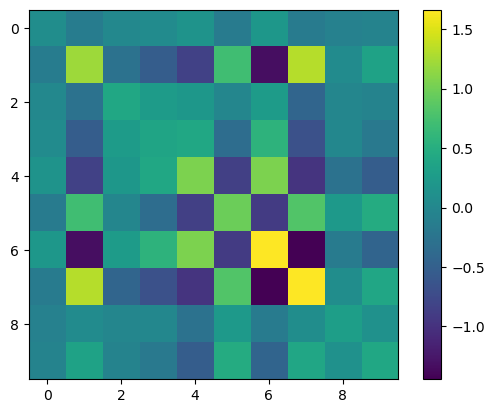

In [472]:
p=10
Psi=np.eye(p)
a_cov = stats.invwishart(df=p+2, scale=Psi).rvs()
n=100
x=stats.multivariate_normal(mean=np.zeros(p), cov=a_cov).rvs(size=n)
plt.imshow(a_cov)
plt.colorbar();

In [473]:
with pm.Model() as MNV_LKJ:
    
    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0, 
                                 sd_dist=pm.Exponential.dist(1.0, shape=2), 
                                 compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    mu = pm.MvNormal('mu', mu=0, cov=np.eye(p), shape=p) 
    y = pm.MvNormal('y', mu=mu, chol=L,  #cov=Sigma
                    shape=(n,1), observed=x)   
    
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [packed_L, mu]


/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


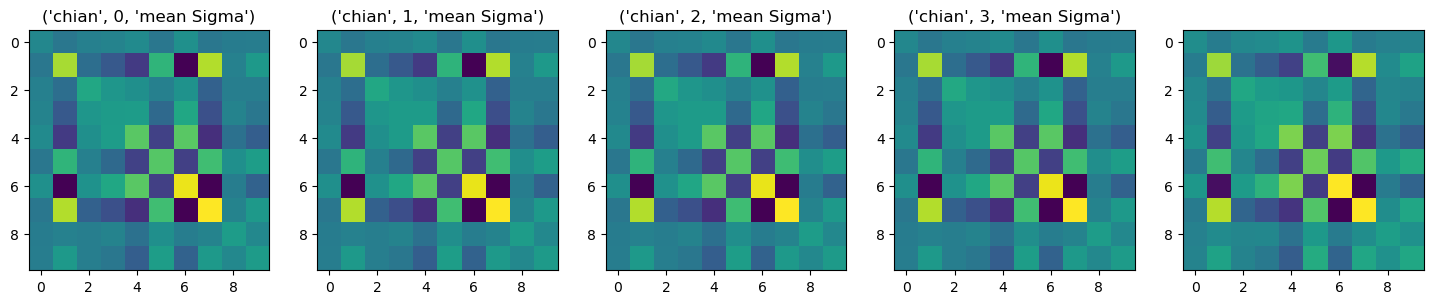

In [474]:
fig,ax = plt.subplots(1,5,figsize=(18,4))
ax[-1].imshow(a_cov)
ax[0].set_title(("Sigma used to generate y"))
for chain in range(4):
    ax[chain].imshow(idata.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(("chian",chain,"mean Sigma"))

## MVN computation 

Using the **Cholesky decomposition** is desirable because it provides efficient computation **MVN** evaluations $(2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}( {y} -{X\beta})^\top{\boldsymbol {\Sigma }}^{-1}({y} - {X\beta})\right)$ since

- $\det({\boldsymbol {\Sigma }}) = \det({LL^T}) = \det({L}) \det({L^T}) = \prod_{k=1}^p  {L}_{kk}^2$ 

as already seen above, but now also

- $(\textbf{y}-\boldsymbol\mu)^\top\boldsymbol\Sigma^{-1}(\textbf{y}-\boldsymbol\mu) = \boldsymbol \epsilon^\top  {L}^{-\top} {L}^{-1} \boldsymbol \epsilon = \underbrace{( {L}^{-1} \boldsymbol \epsilon)^\top( {L}^{-1} \boldsymbol \epsilon) =  \textbf{x}^\top \textbf{x}}_{\Large \Longrightarrow \; {L} \textbf{x}\; =\; \boldsymbol \epsilon} $ 

where $\textbf{x}$ can be efficiently solved for based on **lower triangular backwards substitution** and hence $\textbf{x}^\top \textbf{x}$ directly computed without requiring the inversion $\Sigma^{-1}$


## Week 10 Homework

---

### Q1: perform Bayesian Logistic Regression 

- For a binary outcome dataset you find interesting (perhaps from kaggle.com?)
- Model the outcome as a bernoulli random variable and use a **logit link** function
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than the `pm.MvNormal` version
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

### Q2: perform Bayesian Multivariate Regression

- For a data set for which modeling multiple continuous outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.MvNormal('y', mu=X@betas, chol=L, observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and 
    - report on your findings and based on that 
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, betas]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 9 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 2000 divergences after tuning. Increase `target_accept` or reparameterize.
/opt/conda/lib/python3.11/site-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/opt/conda/lib/python3.11/site-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta0     0.807  1.200  -0.955    2.430      0.514    0.204       7.0   
betas[0]  0.320  0.239  -0.158    0.790      0.013    0.028    1718.0   
betas[1]  0.222  0.341   0.002    0.813      0.170    0.098       7.0   
betas[2] -5.113  2.463  -7.243   -0.919      1.210    0.675       7.0   

          ess_tail  r_hat  
beta0          4.0   1.52  
betas[0]    2841.0   1.52  
betas[1]    2389.0   1.53  
betas[2]    2914.0   1.52  


array([[<Axes: title={'center': 'beta0\n0'}>,
        <Axes: title={'center': 'beta0\n1'}>,
        <Axes: title={'center': 'beta0\n2'}>,
        <Axes: title={'center': 'beta0\n3'}>],
       [<Axes: title={'center': 'betas\n0, 0'}>,
        <Axes: title={'center': 'betas\n0, 1'}>,
        <Axes: title={'center': 'betas\n0, 2'}>,
        <Axes: title={'center': 'betas\n1, 0'}>],
       [<Axes: title={'center': 'betas\n1, 1'}>,
        <Axes: title={'center': 'betas\n1, 2'}>,
        <Axes: title={'center': 'betas\n2, 0'}>,
        <Axes: title={'center': 'betas\n2, 1'}>],
       [<Axes: title={'center': 'betas\n2, 2'}>,
        <Axes: title={'center': 'betas\n3, 0'}>,
        <Axes: title={'center': 'betas\n3, 1'}>,
        <Axes: title={'center': 'betas\n3, 2'}>]], dtype=object)

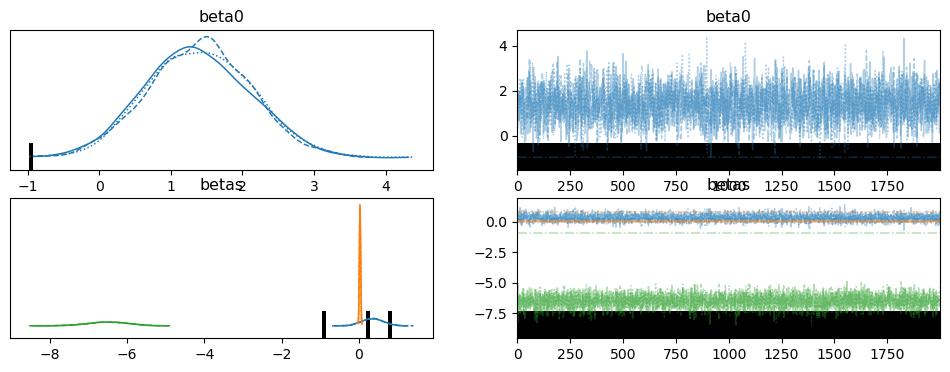

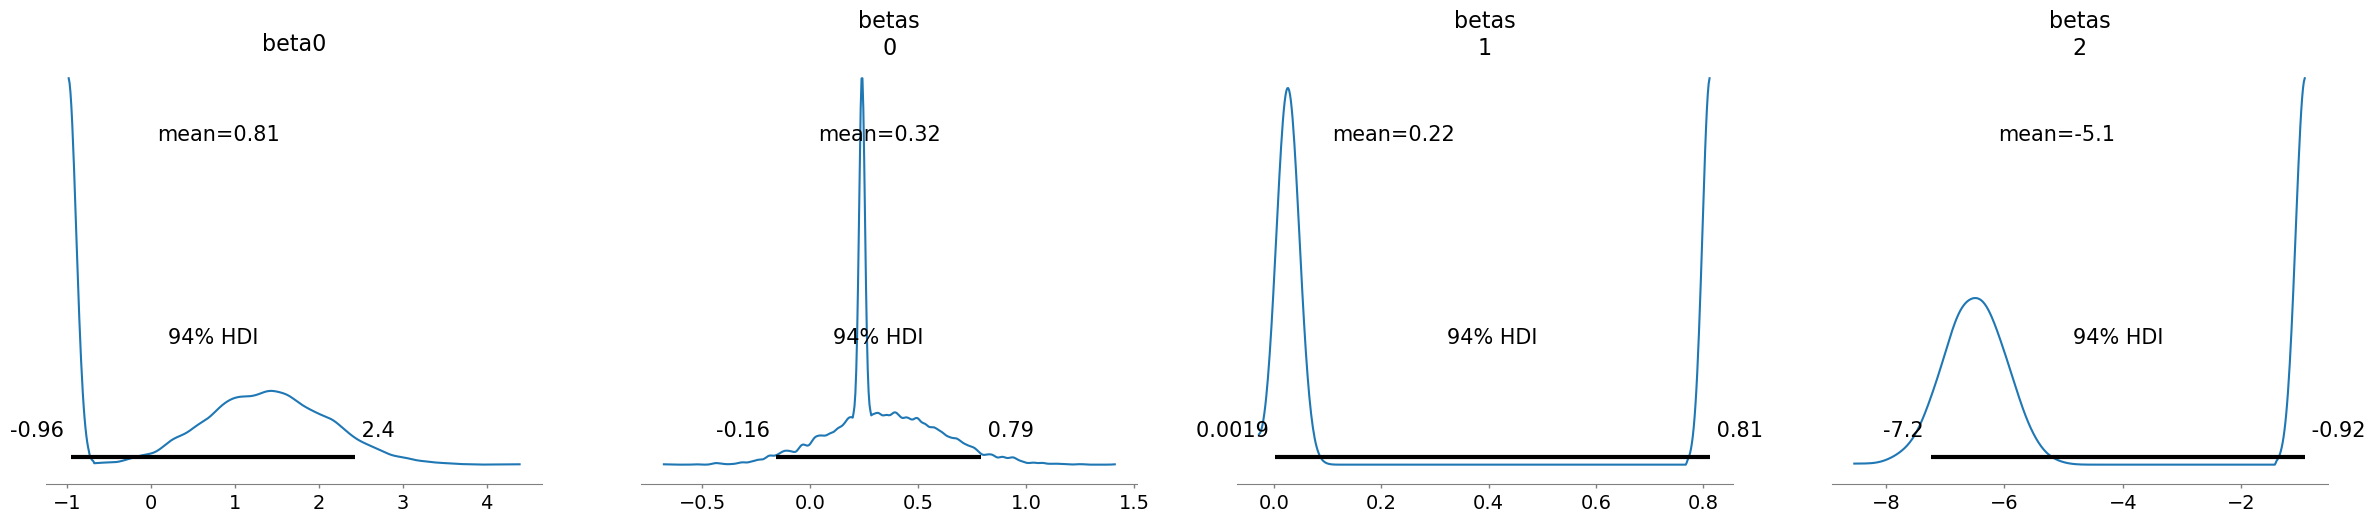

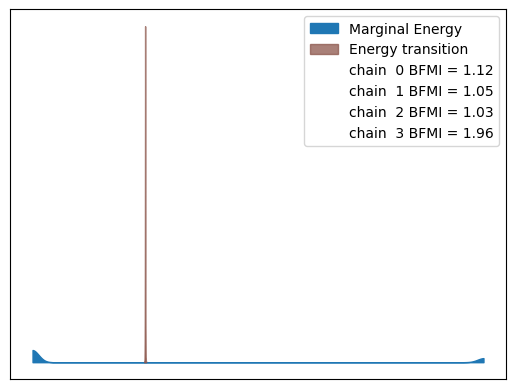

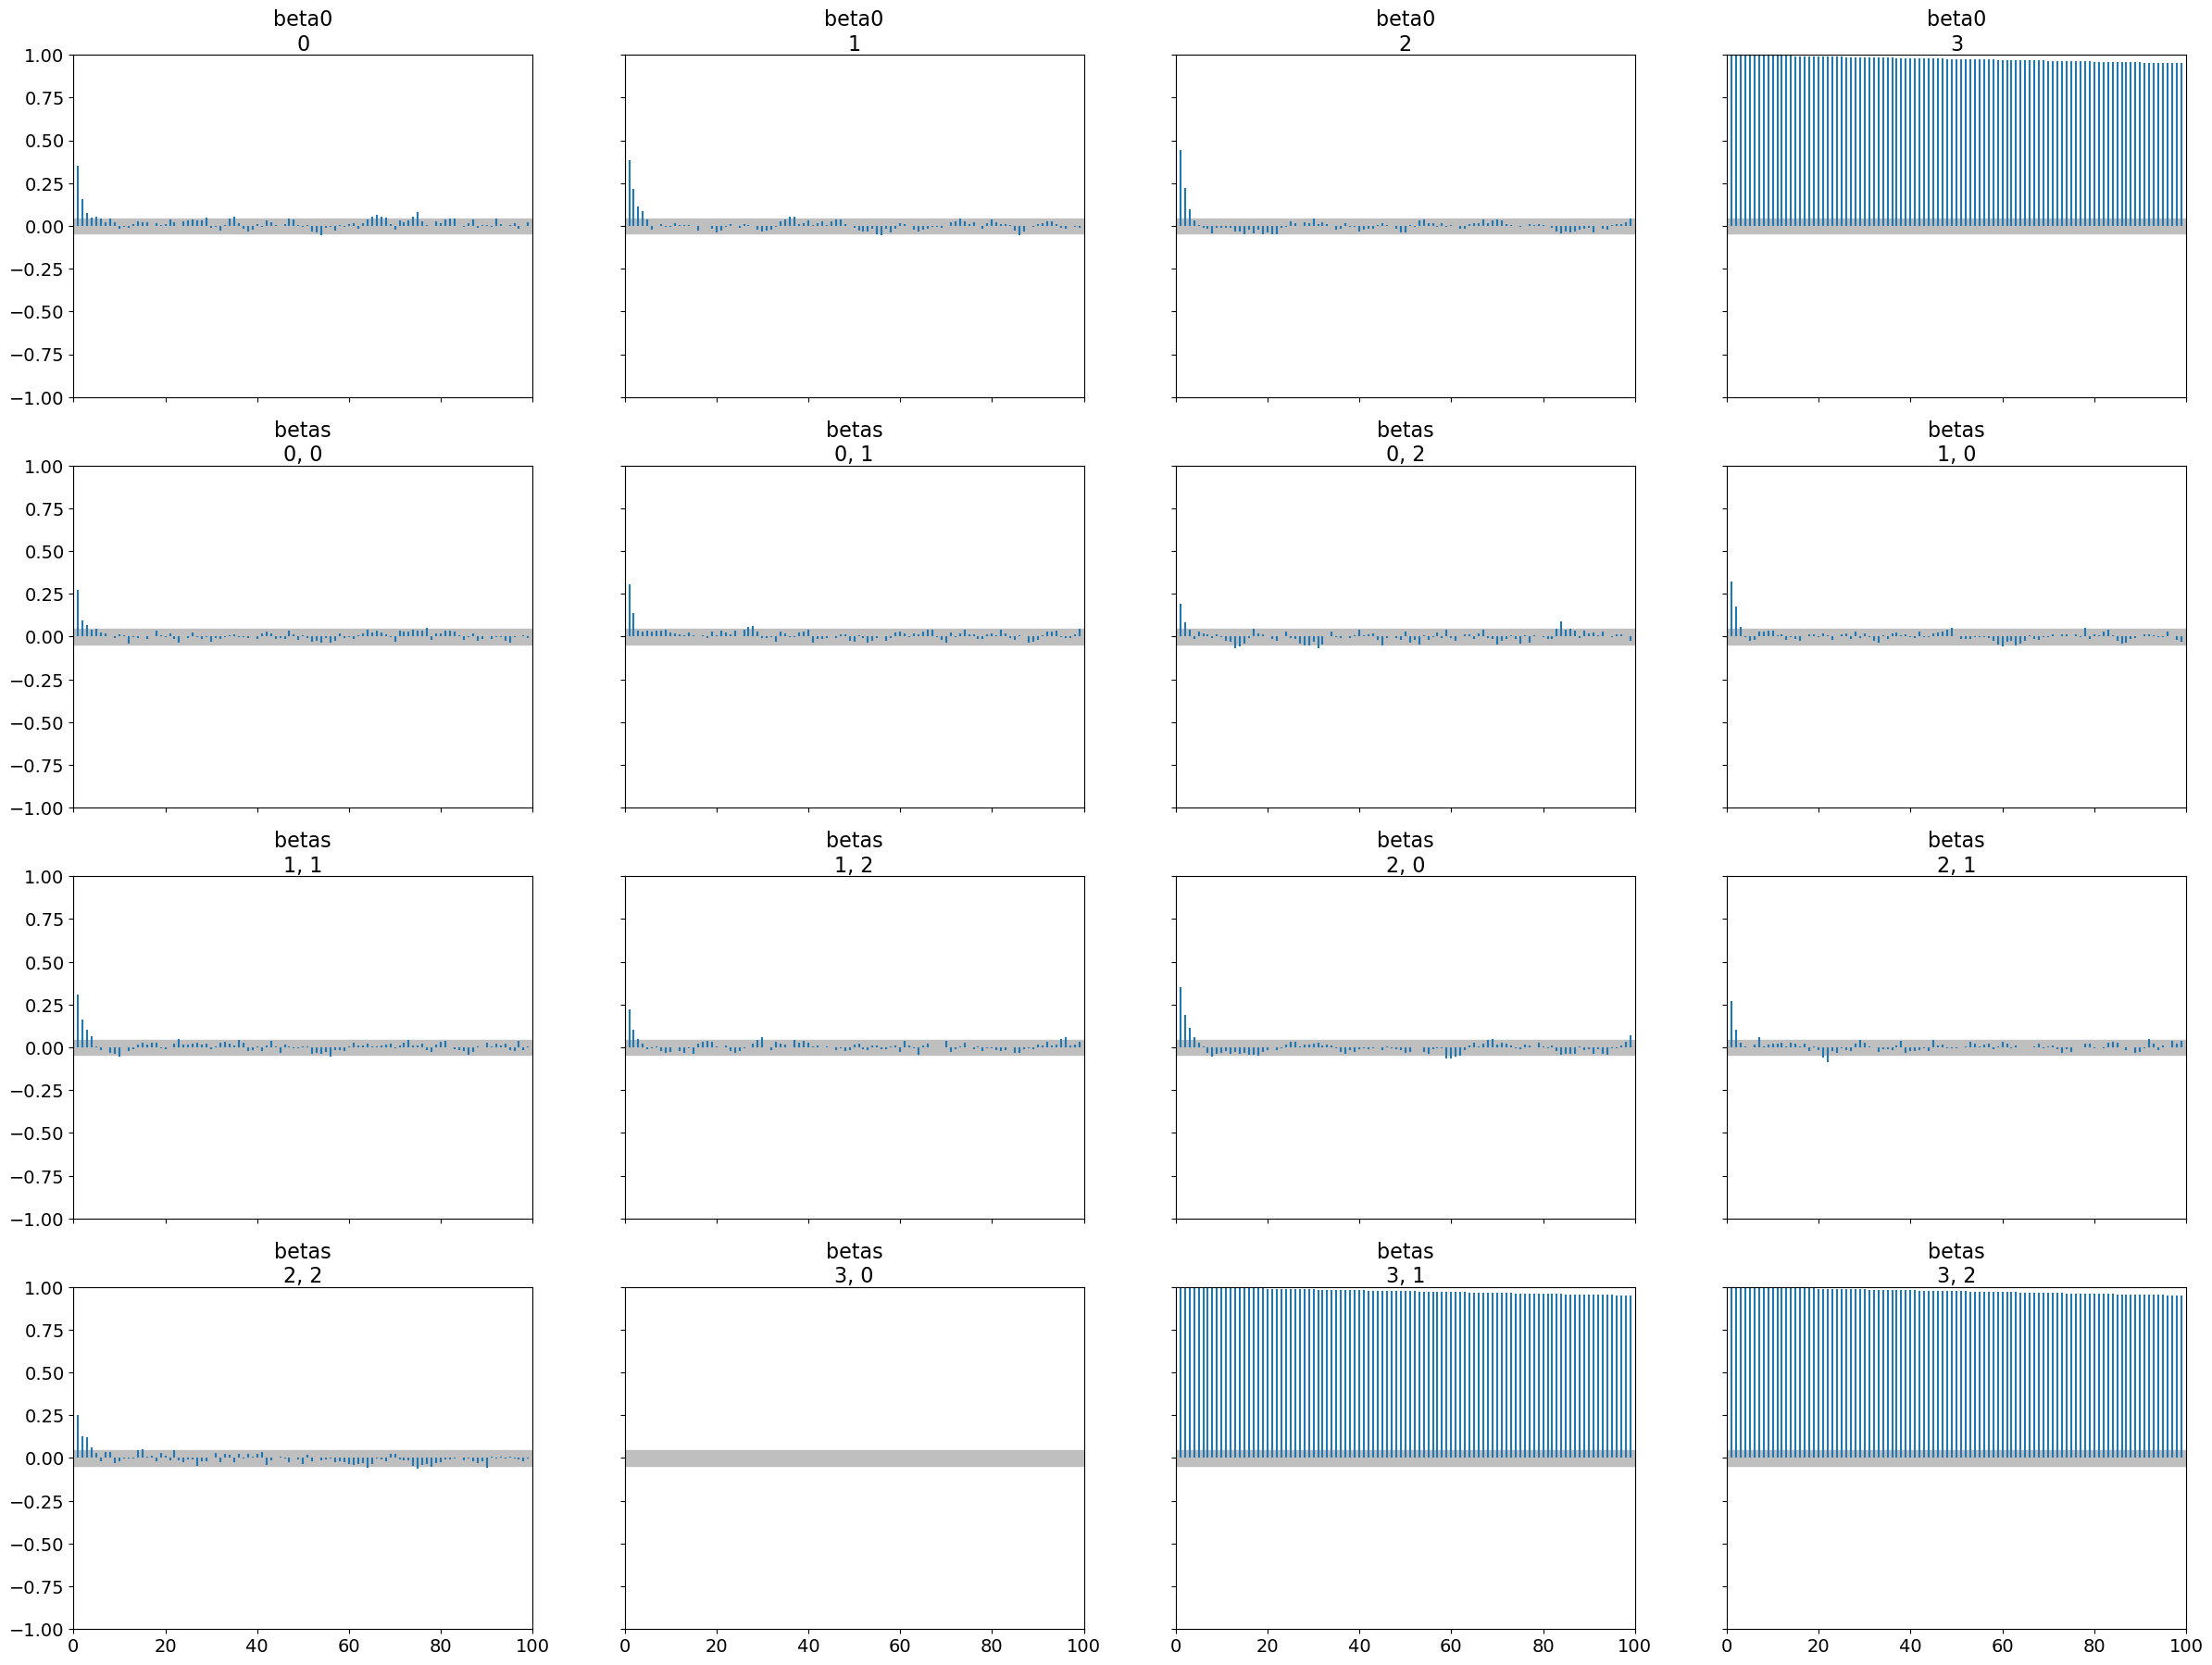

In [7]:
#Q1
#https://www.kaggle.com/datasets/brendan45774/test-file
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Replace this with your own path to the Titanic CSV if you have it locally
titanic_data = pd.read_csv("tested.csv")  # or provide the correct path

# Drop rows with missing Age for simplicity
titanic_data = titanic_data.dropna(subset=["Age"])

# Convert 'Sex' to a binary indicator: 1 if male, 0 if female
titanic_data['Male'] = (titanic_data['Sex'] == 'male').astype(int)

# We'll use only a few predictors for demonstration
titanic_data = titanic_data[['Survived', 'Pclass', 'Age', 'Male']]
titanic_data.head()

X = titanic_data[['Pclass','Age','Male']].values
y = titanic_data['Survived'].values

n, p = X.shape  # number of samples, number of predictors

with pm.Model() as model:
    # Intercept
    beta0 = pm.Normal('beta0', mu=0, sigma=1)
    
    # Coefficients (independent Normal(0,1) priors)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    
    # Linear predictor
    logits = beta0 + pm.math.dot(X, betas)
    
    # Bernoulli likelihood with logit link
    p = pm.math.sigmoid(logits)
    y_obs = pm.Bernoulli('y_obs', p, observed=y)
    
    # Sample from posterior
    trace = pm.sample(2000, tune=1000, target_accept=0.95, random_seed=42)

# Summarize the trace
summary = az.summary(trace)
print(summary)

# Plot posterior distributions
az.plot_trace(trace)
az.plot_posterior(trace)

# MCMC diagnostics
az.plot_energy(trace)
az.plot_autocorr(trace)

In [1]:
#Q2
#https://www.kaggle.com/datasets/mirichoi0218/insurance

import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import pytensor.tensor as pt
import matplotlib.pyplot as plt

# 1. Load insurance data
df = pd.read_csv("insurance.csv")

# 2. Decide on features (X) and target (Y)
df['sex_code'] = df['sex'].map({'male':0, 'female':1})
df['smoker_code'] = df['smoker'].map({'no':0, 'yes':1})

X_cols = ['age', 'children', 'sex_code', 'smoker_code']
Y_cols = ['bmi', 'charges']

# 3. Downsampling
df_downsampled = df.sample(n=200, random_state=42).copy()

# Construct design matrices
X = df_downsampled[X_cols].values  # shape (n, p)
Y = df_downsampled[Y_cols].values  # shape (n, m)

n, p = X.shape     # number of samples, number of predictors
m = Y.shape[1]     # number of continuous outcomes

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 112 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


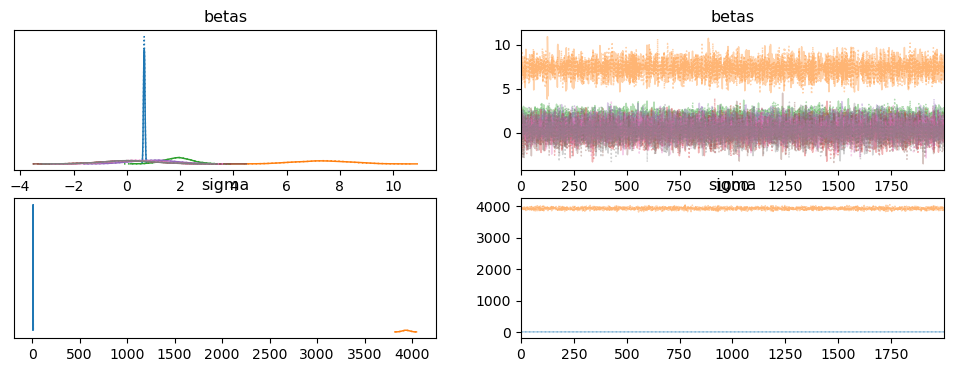

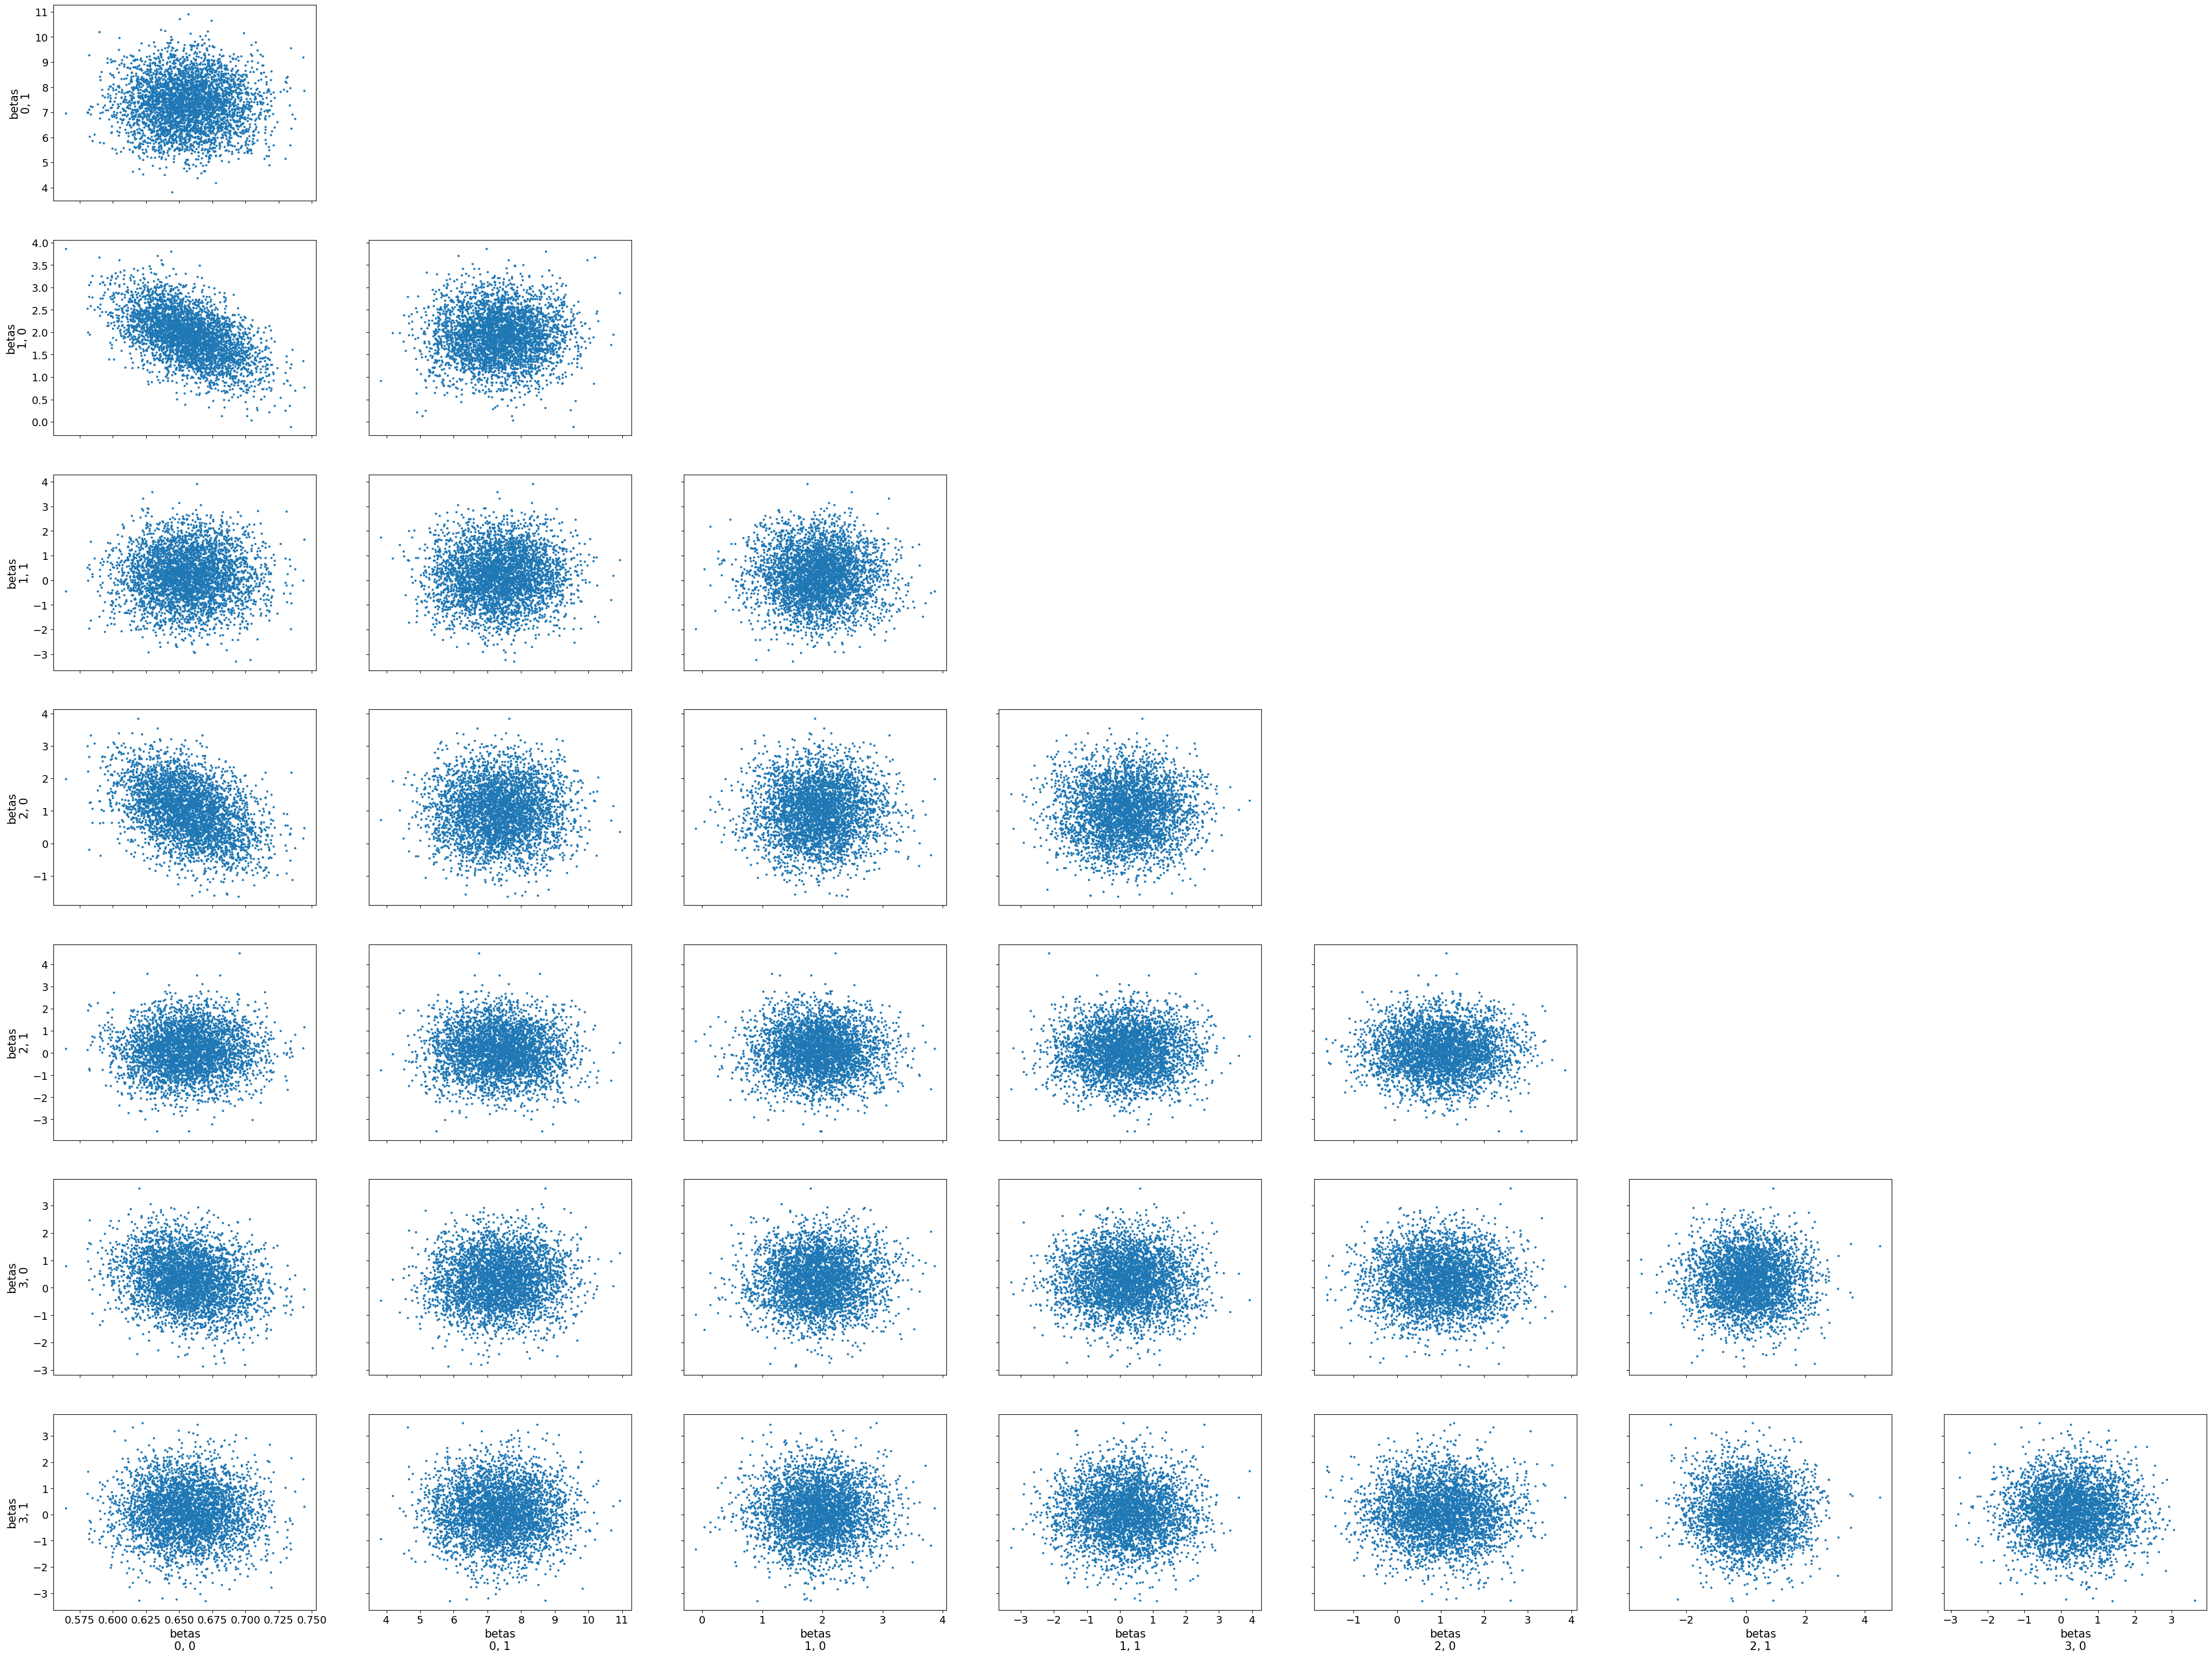

In [2]:
with pm.Model() as multivar_model_diag:
    # 1) Regression coefficients: shape (p, m)
    betas = pm.Normal("betas", mu=0.0, sigma=1.0, shape=(p, m))
    
    # 2) Per-outcome scale parameters (no correlations)
    sigma = pm.Exponential("sigma", lam=1.0, shape=m)
    
    # 3) Linear predictor for each observation
    mu = pm.math.dot(X, betas)  # shape (n, m)
    
    # 4) Create the diagonal covariance matrix: diag(sigma^2)
    cov = pt.diag(sigma**2)
    
    # 5) Define MvNormal with a diagonal covariance
    y_obs = pm.MvNormal("y", mu=mu, cov=cov, observed=Y)

    # 6) Sample
    trace_diag = pm.sample(draws=2000, tune=1000, chains=2, random_seed=42)

# Posterior summary
az.summary(trace_diag)

az.plot_trace(trace_diag)
plt.show()

az.plot_pair(trace_diag, var_names=["betas"])
plt.show()

In [295]:
n,m,p = 100,10,5
beta_ = np.ones((p,m))
X = stats.norm().rvs((n,p))
a_cov = stats.invwishart(df=m+2, scale=np.eye(m)).rvs()
x = X@beta_ + stats.multivariate_normal(mean=np.zeros(m), cov=a_cov).rvs(size=n)

with pm.Model() as MNV_LKJ:
    
    packed_L = pm.LKJCholeskyCov("packed_L", n=m, eta=2.0, 
                                 sd_dist=pm.Exponential.dist(1.0, shape=m), 
                                 compute_corr=False)
    L = pm.expand_packed_triangular(m, packed_L)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p,m))
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    y = pm.MvNormal('y', mu=X@betas, chol=L,  #cov=Sigma
                    observed=x)   
    
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [packed_L, betas]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


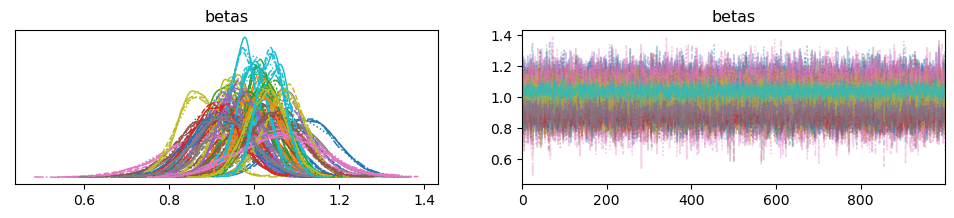

In [296]:
import arviz as az

az.plot_trace(idata,var_names='betas');

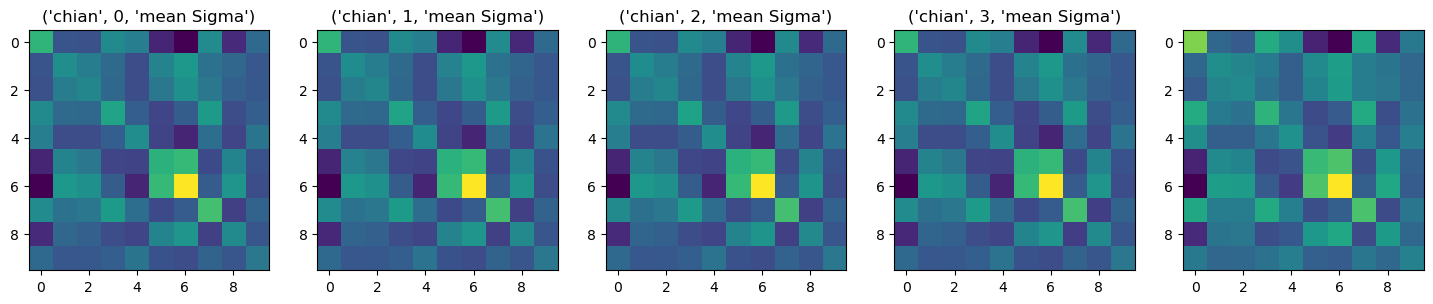

In [297]:
fig,ax = plt.subplots(1,5,figsize=(18,4))
ax[-1].imshow(a_cov)
ax[0].set_title(("Sigma used to generate y"))
for chain in range(4):
    ax[chain].imshow(idata.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(("chian",chain,"mean Sigma"))

### Probit Regression (as opposed to Logistic Regression)

- $\Phi$ is CDF of standard normal (and is also call the **inverse probit** function)
    - The **probit** function is $\Phi^{-1}$
- $z_i \sim N(x_i^\top\beta,1)$


$$\int \Phi(z_i)^{y_i} (1-\Phi(z_i))^{1-y_i}d\Phi(z) = \Phi(x_i^\top\beta)^{y_i} (1-\Phi(x_i^\top\beta))^{1-y_i} = p_i^{y_i} (1-p_i)^{1-y_i} $$

### Q3: perform Bayesian Multivariate Classification

- For a data set for which modeling multiple binary outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Use latent `z = pm.MvNormal('z', mu=X@betas, chol=L)` as discussed in the "Generalized Linear Models (GLM)" section of the previous weeks lecture notes

> This provides normally distributed latent variables connected to the observed binary outcomes on which a latent covariance dependency structure may be modelled and estimated on the basis of imputing the unobserved latent variables based on their connection with the observed binary outcome variables.

- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and 
    - report on your findings and based on that 
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas, chol_packed, z]


Sampling 2 chains for 1_000 tune and 1_500 draw iterations (2_000 + 3_000 draws total) took 1111 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]    -2.788  0.363  -3.508   -2.198      0.213    0.095       3.0   
betas[0, 1]    -0.196  0.054  -0.298   -0.112      0.018    0.008       8.0   
betas[0, 2]     0.350  0.170   0.025    0.640      0.030    0.014      31.0   
betas[1, 0]     0.117  0.140  -0.164    0.382      0.020    0.030      52.0   
betas[1, 1]     0.105  0.030   0.041    0.154      0.016    0.006       4.0   
betas[1, 2]     1.749  0.103   1.534    1.943      0.026    0.011      16.0   
betas[2, 0]     0.069  0.137  -0.202    0.310      0.029    0.016      23.0   
betas[2, 1]    -0.003  0.026  -0.047    0.040      0.012    0.002       5.0   
betas[2, 2]     0.035  0.087  -0.134    0.198      0.011    0.006      59.0   
betas[3, 0]    -0.425  0.313  -1.052    0.130      0.059    0.025      30.0   
betas[3, 1]     0.035  0.058  -0.068    0.146      0.015    0.012      20.0   
betas[3, 2]    -0.453  0.236  -0.866    0.014      0

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

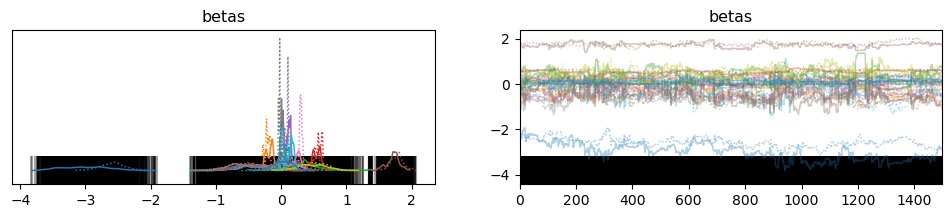

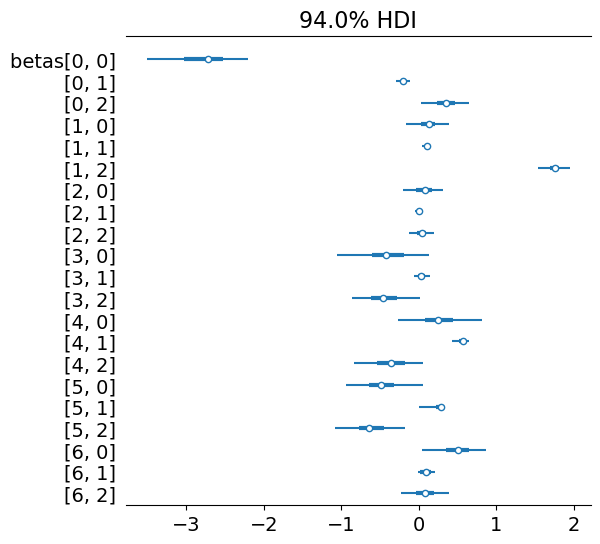

In [1]:
#Q3
#https://www.kaggle.com/datasets/mirichoi0218/insurance

import pandas as pd
import pymc as pm
import numpy as np
import arviz as az
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
data = pd.read_csv('insurance.csv')

# Binary targets
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['high_bmi'] = (data['bmi'] >= 30).astype(int)
data['high_charges'] = (data['charges'] >= data['charges'].median()).astype(int)

# Encode categorical variables
data = pd.get_dummies(data, columns=['region', 'sex'], drop_first=True)

# Define features and targets
X = data[['age', 'children', 'region_northwest',
          'region_southeast', 'region_southwest', 'sex_male']]
y = data[['smoker', 'high_bmi', 'high_charges']]

# Make a copy to avoid SettingWithCopyWarning
X_copy = X.copy()

# Standardize numeric columns
scaler = StandardScaler()
X_copy[['age', 'children']] = scaler.fit_transform(X_copy[['age', 'children']])

# Convert everything to float
X_copy = X_copy.astype(float)

# Convert to NumPy and add intercept
X_np = X_copy.to_numpy()
X_np = np.hstack([np.ones((X_np.shape[0], 1)), X_np])

n, p = X_np.shape
m = y.shape[1]

with pm.Model() as insurance_model:
    
    # Coefficients: shape=(p, m)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p, m))
    
    # Covariance via LKJ
    chol, corr, stds = pm.LKJCholeskyCov('chol_packed', n=m, eta=2,
                                         sd_dist=pm.Exponential.dist(1.0))
    
    # Latent variables
    z = pm.MvNormal('z', mu=X_np @ betas, chol=chol, shape=(n, m))
    
    # Probit link
    p_ = pm.Deterministic('p', pm.math.invprobit(z))
    
    # Bernoulli likelihood
    y_obs = pm.Bernoulli('y_obs', p=p_, observed=y.values)
    
    # Sampling
    trace = pm.sample(1500, tune=1000, cores=2, target_accept=0.9)

print(az.summary(trace, var_names=['betas', 'chol_packed']))
az.plot_trace(trace, var_names=['betas'])
az.plot_forest(trace, var_names=['betas'], combined=True)

### Exploring different sample sizes:


--- Fitting model with n_sub = 50 ---


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas, chol_packed, z]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 232 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


                mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]    -1.69  0.59   -2.78    -0.63       0.03     0.02    291.03   
betas[0, 1]    -0.19  0.56   -1.30     0.82       0.02     0.02    608.64   
betas[0, 2]    -0.22  0.56   -1.21     0.87       0.03     0.02    441.03   
betas[1, 0]     0.30  0.44   -0.55     1.09       0.02     0.01    707.70   
betas[1, 1]     0.62  0.42   -0.20     1.37       0.02     0.01    670.20   
betas[1, 2]     1.48  0.49    0.63     2.37       0.03     0.02    229.83   
betas[2, 0]     0.12  0.45   -0.70     1.05       0.02     0.02    445.83   
betas[2, 1]     0.12  0.44   -0.70     0.96       0.01     0.02    892.22   
betas[2, 2]     0.47  0.43   -0.37     1.27       0.02     0.01    433.34   
betas[3, 0]    -0.12  0.76   -1.58     1.19       0.03     0.02    727.24   
betas[3, 1]     0.24  0.76   -1.12     1.68       0.03     0.03    876.44   
betas[3, 2]     0.00  0.75   -1.44     1.40       0.03     0.02    549.32   

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas, chol_packed, z]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 352 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


                mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]    -2.03  0.50   -3.04    -1.12       0.06     0.03     65.96   
betas[0, 1]    -0.17  0.40   -0.98     0.58       0.04     0.02    106.32   
betas[0, 2]    -0.13  0.37   -0.89     0.55       0.03     0.02    200.03   
betas[1, 0]     0.12  0.25   -0.30     0.66       0.03     0.01     75.78   
betas[1, 1]     0.23  0.23   -0.19     0.68       0.02     0.01    114.71   
betas[1, 2]     1.40  0.30    0.78     1.89       0.04     0.03     55.90   
betas[2, 0]     0.31  0.27   -0.20     0.82       0.03     0.01     89.17   
betas[2, 1]    -0.10  0.26   -0.54     0.44       0.03     0.03     63.60   
betas[2, 2]    -0.05  0.23   -0.47     0.39       0.02     0.01    134.41   
betas[3, 0]     0.16  0.51   -0.68     1.29       0.03     0.02    242.84   
betas[3, 1]    -0.35  0.52   -1.36     0.65       0.06     0.02     82.78   
betas[3, 2]     0.21  0.49   -0.76     1.16       0.04     0.03    179.15   

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas, chol_packed, z]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 398 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


                mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]    -2.45  0.43   -3.28    -1.75       0.07     0.02     39.88   
betas[0, 1]    -0.19  0.20   -0.54     0.23       0.02     0.03     85.25   
betas[0, 2]     0.67  0.28    0.16     1.22       0.03     0.02     80.61   
betas[1, 0]     0.09  0.23   -0.35     0.58       0.03     0.02     85.78   
betas[1, 1]     0.20  0.09    0.03     0.36       0.01     0.01     64.61   
betas[1, 2]     1.60  0.16    1.28     1.87       0.02     0.01     62.93   
betas[2, 0]     0.11  0.20   -0.30     0.47       0.02     0.01    148.12   
betas[2, 1]    -0.15  0.08   -0.28    -0.00       0.01     0.00     89.35   
betas[2, 2]     0.05  0.15   -0.22     0.33       0.01     0.01    121.67   
betas[3, 0]    -0.72  0.51   -1.66     0.21       0.05     0.03    101.39   
betas[3, 1]    -0.02  0.23   -0.45     0.38       0.02     0.02     96.64   
betas[3, 2]    -0.71  0.43   -1.50     0.19       0.10     0.07     28.00   

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas, chol_packed, z]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 369 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics



FINAL SUMMARY (n_sub = 200):
                mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]    -2.13  0.50   -3.01    -1.23       0.05     0.03     87.01   
betas[0, 1]    -0.13  0.42   -0.99     0.63       0.05     0.03     68.18   
betas[0, 2]    -0.12  0.38   -0.79     0.61       0.04     0.02     94.22   
betas[1, 0]     0.12  0.31   -0.44     0.71       0.03     0.01    116.01   
betas[1, 1]     0.23  0.25   -0.23     0.72       0.03     0.02     80.03   
betas[1, 2]     1.45  0.28    1.02     2.04       0.03     0.01     82.27   
betas[2, 0]     0.29  0.30   -0.32     0.79       0.04     0.02     64.35   
betas[2, 1]    -0.14  0.23   -0.57     0.29       0.02     0.01    227.60   
betas[2, 2]    -0.08  0.25   -0.51     0.40       0.02     0.01    135.34   
betas[3, 0]     0.19  0.54   -0.83     1.25       0.04     0.02    229.76   
betas[3, 1]    -0.25  0.49   -1.23     0.60       0.03     0.02    206.80   
betas[3, 2]     0.17  0.51   -0.81     1.15   

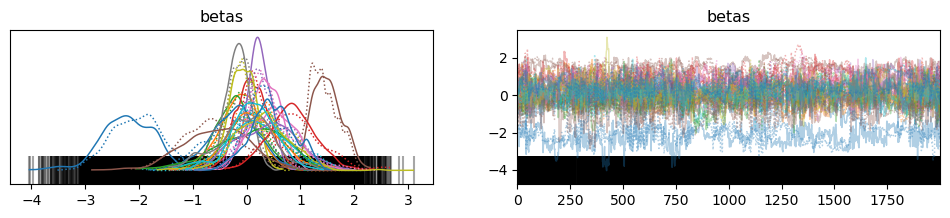

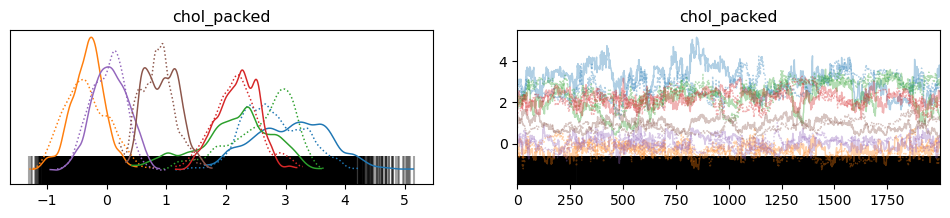

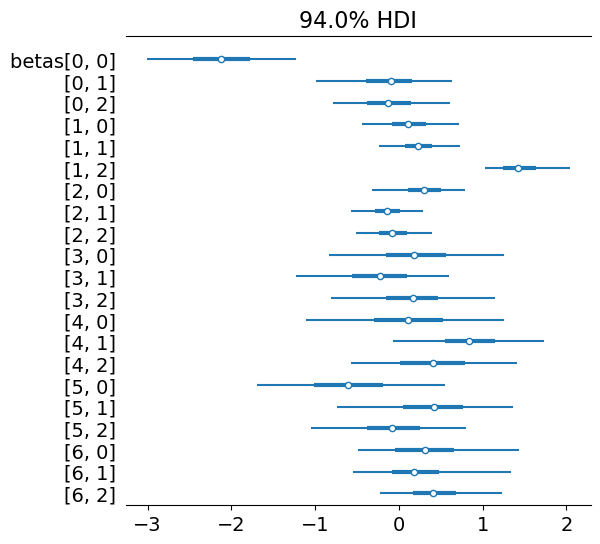


MCMC Diagnostics:
                mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]    -2.13  0.50   -3.01    -1.23       0.05     0.03     87.01   
betas[0, 1]    -0.13  0.42   -0.99     0.63       0.05     0.03     68.18   
betas[0, 2]    -0.12  0.38   -0.79     0.61       0.04     0.02     94.22   
betas[1, 0]     0.12  0.31   -0.44     0.71       0.03     0.01    116.01   
betas[1, 1]     0.23  0.25   -0.23     0.72       0.03     0.02     80.03   
betas[1, 2]     1.45  0.28    1.02     2.04       0.03     0.01     82.27   
betas[2, 0]     0.29  0.30   -0.32     0.79       0.04     0.02     64.35   
betas[2, 1]    -0.14  0.23   -0.57     0.29       0.02     0.01    227.60   
betas[2, 2]    -0.08  0.25   -0.51     0.40       0.02     0.01    135.34   
betas[3, 0]     0.19  0.54   -0.83     1.25       0.04     0.02    229.76   
betas[3, 1]    -0.25  0.49   -1.23     0.60       0.03     0.02    206.80   
betas[3, 2]     0.17  0.51   -0.81     1.15       0.04   

In [3]:
#Q3

import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("insurance.csv")

# Create binary targets
data["smoker"] = data["smoker"].map({"yes": 1, "no": 0})
data["high_bmi"] = (data["bmi"] >= 30).astype(int)
data["high_charges"] = (data["charges"] >= data["charges"].median()).astype(int)

# Encode categorical variables (creates numeric dummies)
data = pd.get_dummies(data, columns=["region", "sex"], drop_first=True)

# Define features and targets
X_cols = ["age", "children", "region_northwest", "region_southeast", "region_southwest", "sex_male"]
y_cols = ["smoker", "high_bmi", "high_charges"]

X_full = data[X_cols].copy()
y_full = data[y_cols].copy()

# Standardize numeric columns using a copy to avoid SettingWithCopyWarning
scaler = StandardScaler()
X_full[["age", "children"]] = scaler.fit_transform(X_full[["age", "children"]])

# Ensure all features are numeric
X_full = X_full.astype(float)
y_full = y_full.astype(int)

# Convert DataFrames to NumPy arrays
X_all = X_full.to_numpy()
y_all = y_full.to_numpy()

# Downsampling
def fit_multivariate_probit(X, y, n_sub, draws=1000, tune=500, seed=123):
    """
    Downsample X, y to n_sub rows, fit the multivariate probit model, and return the trace and summary.
    """
    rng = np.random.default_rng(seed)
    indices = rng.choice(len(X), size=n_sub, replace=False)
    
    X_sub = X[indices]
    y_sub = y[indices]
    
    # Add intercept column
    intercept = np.ones((X_sub.shape[0], 1), dtype=float)
    X_sub = np.hstack([intercept, X_sub])
    
    n, p = X_sub.shape
    m = y_sub.shape[1]
    
    with pm.Model() as model:
        # Coefficient matrix: shape (p, m)
        betas = pm.Normal("betas", mu=0, sigma=1, shape=(p, m))
        
        # Covariance structure using the LKJ prior (returns chol, correlation, stds)
        chol, corr, stds = pm.LKJCholeskyCov(
            "chol_packed",
            n=m,
            eta=2,
            sd_dist=pm.Exponential.dist(1.0)
        )
        
        # Latent variables z with multivariate normal likelihood
        z = pm.MvNormal("z", mu=X_sub @ betas, chol=chol, shape=(n, m))
        
        # Probit link function transforms latent z to probabilities
        p_link = pm.Deterministic("p", pm.math.invprobit(z))
        
        # Observed outcomes modeled as Bernoulli
        y_obs = pm.Bernoulli("y_obs", p=p_link, observed=y_sub)
        
        # Sample from the posterior
        trace = pm.sample(
            draws=draws,
            tune=tune,
            target_accept=0.9,
            random_seed=seed,
            cores=2,
            progressbar=True
        )
    
    summary_df = az.summary(trace, var_names=["betas", "chol_packed"], round_to=2)
    return trace, summary_df

# Different Sample Sizes
sample_sizes = [50, 200, 500]
results = {}

print("### Exploring different sample sizes:\n")
for n_sub in sample_sizes:
    print(f"\n--- Fitting model with n_sub = {n_sub} ---")
    trace_sub, summary_sub = fit_multivariate_probit(X_all, y_all, n_sub, draws=1000, tune=500)
    results[n_sub] = {"trace": trace_sub, "summary": summary_sub}
    print(summary_sub)

# Observations: 
# - With n=50, the model runs quickly but the posterior intervals are wide.
# - At n=200, estimates stabilize while still being computationally efficient.
# - At n=500, inference becomes more precise but requires more runtime.

n_final = 200  # Based on the exploratory findings, we choose 200
print(f"\n=== Running full analysis with n_sub = {n_final} ===")
trace_final, summary_final = fit_multivariate_probit(X_all, y_all, n_final, draws=2000, tune=1000)
print("\nFINAL SUMMARY (n_sub = 200):")
print(summary_final)

az.plot_trace(trace_final, var_names=["betas"])
plt.show()

az.plot_trace(trace_final, var_names=["chol_packed"])
plt.show()

# Forest plot for betas (combined chains)
az.plot_forest(trace_final, var_names=["betas"], combined=True)
plt.show()

# Display detailed diagnostics summary (including R-hat, effective sample size, etc.)
diagnostics = az.summary(trace_final, var_names=["betas", "chol_packed"], round_to=2)
print("\nMCMC Diagnostics:")
print(diagnostics)


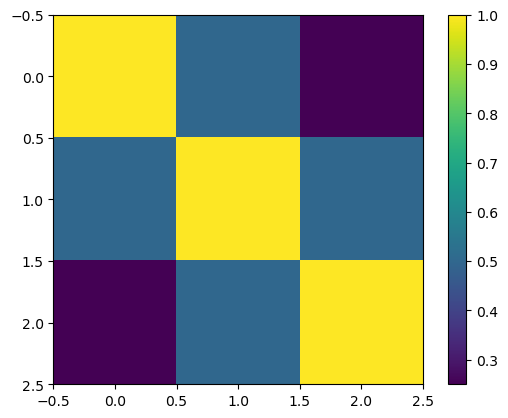

In [393]:
n,m,p = 100,3,3
beta_ = np.ones((p,m))
X = stats.norm().rvs((n,p))
#a_cov = stats.invwishart(df=m+2, scale=np.ones(m)).rvs()
a_cor = (np.ones((p,p))+np.diag((1,1,1)))/2
a_cor[0,-1] = 0.25
a_cor[-1,0] = 0.25
x = X@beta_ + stats.multivariate_normal(mean=np.zeros(m), cov=a_cor).rvs(size=n)
plt.imshow(a_cor)
plt.colorbar()

# Make outcome binary
x = x>0

In [394]:
with pm.Model() as GLM:
    
    L,R,std = pm.LKJCholeskyCov("R", n=m, eta=2.0, 
                                sd_dist=pm.Exponential.dist(1.0, shape=m), 
                                compute_corr=True)
    #L = pm.expand_packed_triangular(m, packed_L)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p,m))
    #Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    z = pm.MvNormal('z', mu=X@betas, cov=R) #cov=Sigma
    # the probit is the inverse cdf of a standard normal
    # the inverse probit is the cdf of a standard normal
    y = pm.Bernoulli('y', p=pm.math.invprobit(z), observed=x)   
    # Integrating out z would give:
    #y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)   
    
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [R, betas, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 141 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1424 divergences after tuning. Increase `target_accept` or reparameterize.


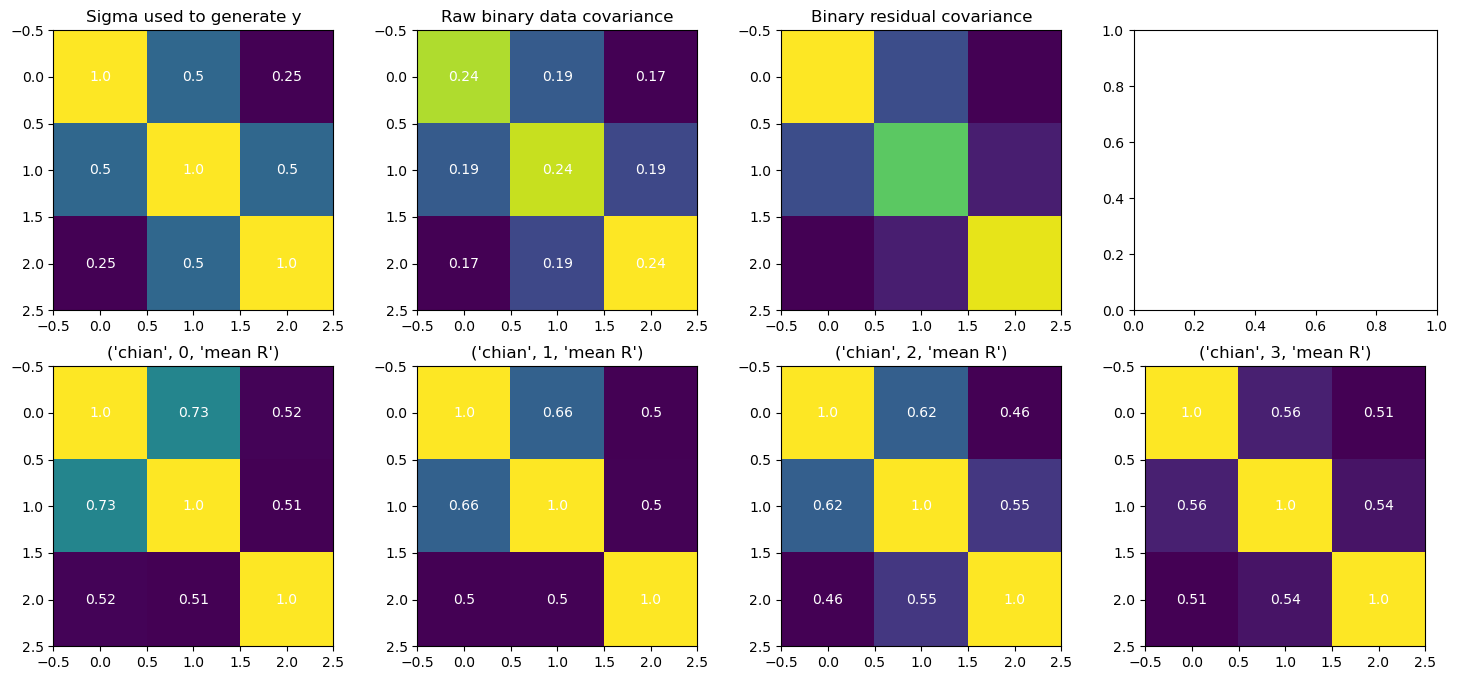

In [427]:
fig,ax = plt.subplots(2,4,figsize=(18,8))
ax[0,0].imshow(a_cor)
ax[0,0].set_title(("Sigma used to generate y"))
for i in range(3):
    for j in range(3):
        ax[0,0].text(i,j,str(round(a_cor[j,i],2)),
                     c='w', ha='center', va='center')
ax[0,1].imshow(np.cov(x.T))
ax[0,1].set_title(("Raw binary data covariance"))
for i in range(3):
    for j in range(3):
        ax[0,1].text(i,j,str(round(np.cov(x.T)[j,i],2)),
                     c='w', ha='center', va='center')
ax[0,2].imshow(np.cov((x-stats.norm().cdf(X@beta_)).T))
ax[0,2].set_title(("Binary residual covariance"))
for chain in range(4):
    ax[1,chain].imshow(idata.posterior['R_corr'].mean(axis=1)[chain])
    for i in range(3):
        for j in range(3):
            ax[1,chain].text(i,j,str(round(idata.posterior['R_corr'].mean(axis=1)[chain].values[j,i],2)),
                             c='w', ha='center', va='center')
    ax[1,chain].set_title(("chian",chain,"mean R"))

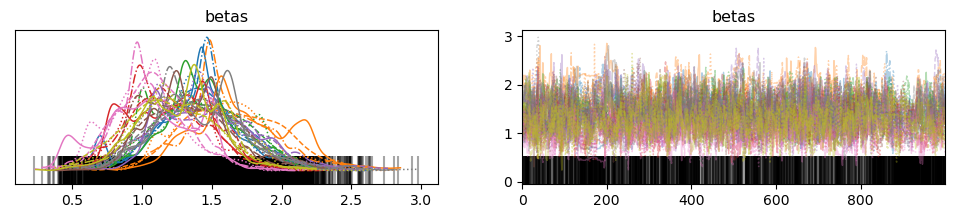

In [405]:
az.plot_trace(idata,var_names='betas');